In [57]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
%matplotlib inline
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()

In [58]:
#set up data
x_vals = iris.data[:,2]
y_vals = iris.data[:,0]

In [59]:
#set up variables and placeholders
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(dtype=tf.float32,shape=[None,1])
y_target = tf.placeholder(dtype=tf.float32,shape=[None,1])
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [60]:
#y=Ax+b
model_output = tf.add(tf.matmul(x_data, A),b)

In [61]:
#L2 loss function and optimizer
loss = tf.reduce_mean(tf.square(y_target-model_output))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [62]:
#train
loss_vec = []

for i in range(100):
    rand_index = np.random.choice(len(x_vals),size = batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data:rand_x,y_target:rand_y})
    temp_loss = sess.run(loss,feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vec.append(temp_loss)
    if(i+1)%20==0:
        print('Step # ' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step # 20 A = [[1.2160382]] b = [[0.35829705]]
Loss = 2.809639
Step # 40 A = [[1.174273]] b = [[1.5353236]]
Loss = 2.2467725
Step # 60 A = [[0.910485]] b = [[2.3134081]]
Loss = 0.9846027
Step # 80 A = [[0.73519784]] b = [[2.8510869]]
Loss = 0.54300886
Step # 100 A = [[0.7044387]] b = [[3.2812061]]
Loss = 0.4598059


In [63]:
#extract coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

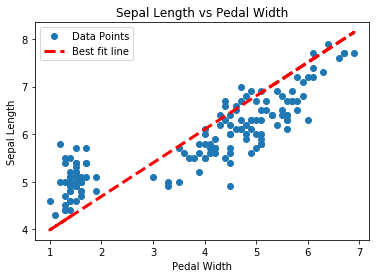

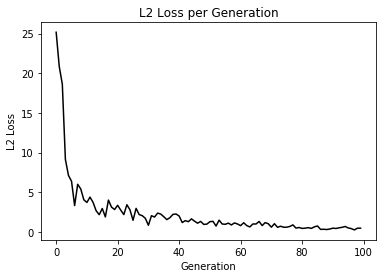

In [64]:
#plot
plt.plot(x_vals,y_vals, 'o', label='Data Points')
plt.plot(x_vals,best_fit, 'r--', label='Best fit line',linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()